# Počasí vs. realita – Transformace všeho

Nejdřív musím naimportovat všechny knihovny 🐼

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re

## 1. Čištění CHMI_TEPLOTA

In [2]:
df_chmi_temp = pd.read_csv("in/tables/chmu_tab_teplota.csv")

Potřebuji najít prázdná místa a nahradit je NaN. Prázdná místa ale tady nejsou normální mezery, ale pevné mezery.  
Rada od Toma: Místo toho, abych hledala divný mezery (což by skrze unescape a normalize také šlo), tak najdu hodnoty, které mě naopak zajímají - tedy ty, které sedí do regexu
```
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re
import numpy as np
​
from html import unescape
from unicodedata import normalize
​
​
df_chmi_temp = pd.read_csv("chmu_tab_teplota.csv")
​
# Matchne optional plus nebo minus ([\+-]?),
# za nim alespon 1 cislici (\d+),
# za ni muze byt (?:nejaka zrudnost)?
# bud desetinna tecka nebo carka ([\.,])
# a alespon 1 cislice (\d+).
# \+ je escapovani plusu aby znamenalo doslova znak plus, a ne kvantifikator "alespon jednou"
# (nejaka zrudnost) je capturing group -- ziska mi co se uvnitr matchlo,
# (?:nejaka zrudnost) je non-capturing group -- slouzi jen k uzavorkovani, neziska vnitrek
# \. je escapovani tecky aby znamenala doslova znak tecka, a ne wildcard pro cokoliv
TEMP_REGEX = re.compile(r"([\+-]?\d+(?:[\.,]\d+)?)")
​
def chmitemptofloat(cell):
    # unescape z HTML zapisu vyrobi unicode znak (tedy z &nbsp; vyrobi zobrazitelnou pevnou mezeru),
    # normalize vrati kanonickou formu unicode znaku (tedy z pevne mezery klasickou mezeru)
    # ta forma NFKC rika jak se to ma konkretne normalizovat, spis se to tyka unicode znaku
    # ktere sestavaji z vic subznaku, tohle by nejdriv rozlozilo ten velky znak (treba
    # C s ocaskem na C a ocasek zvlast), normalizovalo kazdy zvlast a pak zase slozilo vysledek
    decoded = normalize("NFKC", unescape(cell))
    match = TEMP_REGEX.match(decoded)
​
    if match:
        temp = float(match.group(1).replace(",", "."))
    else:
        temp = float("NaN")
​
    return temp
​
df_chmi_temp["Průměrnáteplota"] = df_chmi_temp["Průměrnáteplota"].apply(chmitemptofloat)
​
replaced = df_chmi_temp[df_chmi_temp["Průměrnáteplota"].isna()]
print(replaced)
```

**Musím ze všech sloupců s teplotami udělat FLOAT. (oříznout °C a vyměnit , za .) Z date_stamp musím udělat datetime. Na Relativní vlhkost prdím, protože ji stejně nebudu potřebovat. Stejně jako aktuální teplota (Teplotavzduchu), teplota rosného bodu etc...**

In [3]:
df_chmi_temp

,Stanice,Teplotavzduchu,Teplotarosneho_bodu,Relativnivlhkost,Prumernateplota,Maximalniteplota,Minimalniteplota,Minimalniprizemni_teplota,date_stamp
0,Dukovany,"11,3 °C","-0,2 °C",45%,"9,6 °C","17,9 °C","6,1 °C","1,6 °C",22/10/2021 12:00:00
1,Kocelovice,"7,3 °C","-0,9 °C",56%,"11,1 °C","15,3 °C","3,0 °C","0,6 °C",22/10/2021 12:00:00
2,Ostrava-Mošnov,"10,6 °C","2,1 °C",56%,"12,8 °C","16,3 °C","7,1 °C","4,1 °C",22/10/2021 12:00:00
3,Praha-Libuš,"9,8 °C","-1,1 °C",47%,"12,3 °C","17,9 °C","4,8 °C","1,1 °C",22/10/2021 12:00:00
4,Košetice,"9,1 °C","-1,3 °C",48%,"11,1 °C","16,8 °C","4,2 °C","1,4 °C",22/10/2021 12:00:00
...,...,...,...,...,...,...,...,...,...
2115,Praha-Kbely,"6,6 °C","3,6 °C",81%,"6,4 °C","11,1 °C","0,1 °C","0,0 °C",07/11/2021 19:00:00
2116,Doksany,"7,8 °C","3,2 °C",72%,"5,9 °C","11,8 °C","-0,3 °C","-6,3 °C",07/11/2021 19:00:00
2117,Lysá hora,"0,3 °C","-1,9 °C",85%,"0,2 °C","3,4 °C","-1,5 °C","-3,1 °C",07/11/2021 19:00:00
2118,Přimda,"3,5 °C","3,4 °C",99%,"2,2 °C","6,9 °C","-1,1 °C","-1,3 °C",07/11/2021 19:00:00


In [5]:
def chmitemptofloat(cell):
    TEMP_REGEX = re.compile(r"([\+-]?\d+(?:[\.,]\d+)?)")
    match = TEMP_REGEX.match(cell)
    if match:
        temp = float(match.group(1).replace(",", "."))
    else:
        temp = float("NaN")
    return temp
    
df_chmi_temp["Prumernateplota"] = df_chmi_temp["Prumernateplota"].apply(chmitemptofloat)
df_chmi_temp["Maximalniteplota"] = df_chmi_temp["Maximalniteplota"].apply(chmitemptofloat)
df_chmi_temp["Minimalniteplota"] = df_chmi_temp["Minimalniteplota"].apply(chmitemptofloat)
df_chmi_temp["date_stamp"] = pd.to_datetime(df_chmi_temp["date_stamp"], format = "%d/%m/%Y %H:%M:%S")

Chci vybrat jen ty řádky, kde date_stamp obsahuje pouze 19:00:00 nebo 20:00:00 (to se stalo, když se přetočil čas). Zbylé časy jsou záznamy, kdy jsem si to zkoušela nanečisto apod. 

In [6]:
df_chmi_temp = df_chmi_temp[(df_chmi_temp["date_stamp"].dt.time.astype(str) == "19:00:00") | (df_chmi_temp["date_stamp"].dt.time.astype(str) == "20:00:00")]

Mám tam nějaké duplicity?

In [7]:
df_chmi_temp[df_chmi_temp.duplicated()]

,Stanice,Teplotavzduchu,Teplotarosneho_bodu,Relativnivlhkost,Prumernateplota,Maximalniteplota,Minimalniteplota,Minimalniprizemni_teplota,date_stamp


Snad ne... Počet řádků i sedí s počtem dní od začátku sběru dat.

Vezmu si jen sloupce, které mi k něčemu jsou a chytře je pojmenuji. (Tedy vyhodím ty, co jsou k ničemu a zbylé chytře pojmenuji.)

In [8]:
df_chmi_temp = df_chmi_temp.drop(columns=['Teplotavzduchu', 'Teplotarosneho_bodu', 'Relativnivlhkost', 'Minimalniprizemni_teplota'])

In [9]:
df_chmi_temp = df_chmi_temp.rename(columns={"Stanice": "location", "Prumernateplota": "chmi_temp_avg", "Maximalniteplota": "chmi_temp_max", "Minimalniteplota": "chmi_temp_min"})

Ještě tam přidám sloupec, pomocí kterého budu moci joinovat tabulky - datum, pro který den je měření platné. ČHMÚ vždy uvádí průmerné hodnoty za uplynulý den (tedy od včera 6:00 UTC do dnes 6:00 UTC). Nazvu si to forecast_date i když to není forecast, ale podle toho budu na sebe matchovat jednotlivé tabulky.

In [10]:
df_chmi_temp["forecast_date"] = (df_chmi_temp["date_stamp"] - datetime.timedelta(days = 1)).dt.strftime('%Y-%m-%d')

In [11]:
df_chmi_temp

,location,chmi_temp_avg,chmi_temp_max,chmi_temp_min,date_stamp,forecast_date
160,Kocelovice,5.8,11.4,-1.1,2021-10-10 19:00:00,2021-10-09
161,České Budějovice,5.4,12.8,-0.6,2021-10-10 19:00:00,2021-10-09
162,Ústí nad Orlicí,6.0,13.8,-2.4,2021-10-10 19:00:00,2021-10-09
163,Prostějov,7.2,13.3,-1.7,2021-10-10 19:00:00,2021-10-09
164,Plzeň-Mikulka,6.3,14.7,-1.3,2021-10-10 19:00:00,2021-10-09
...,...,...,...,...,...,...
2115,Praha-Kbely,6.4,11.1,0.1,2021-11-07 19:00:00,2021-11-06
2116,Doksany,5.9,11.8,-0.3,2021-11-07 19:00:00,2021-11-06
2117,Lysá hora,0.2,3.4,-1.5,2021-11-07 19:00:00,2021-11-06
2118,Přimda,2.2,6.9,-1.1,2021-11-07 19:00:00,2021-11-06


## 2. Čištění CHMI_SRAZKY

In [12]:
df_chmi_rain = pd.read_csv("in/tables/out-tables-chmu_tab_srazky-csv.csv")

Tentokrát na to půjdu chytřeji. Beru jen to, co se mi hodí, a dám tomu chytré názvy.

In [13]:
df_chmi_rain = df_chmi_rain.drop(columns=['Srazky_za_posledni_hodinu', 'Srazky_za_12_hodin', 'Celkova_snehova_pokryvka_cm'])

In [14]:
df_chmi_rain = df_chmi_rain.rename(columns={"Stanice": "location", "Srazky_za_24_hodin": "chmi_rain", "Novy_snih_cm": "chmi_snow"})

Udělám ze str float, vyhodím jednotky a z prázdných míst udělám NaN. Tomáš mi ten regex napsal tak hezky, že na to asi půjde použít pořád stejná funkce jako v případě teplot.

In [15]:
df_chmi_rain["chmi_rain"] = df_chmi_rain["chmi_rain"].apply(chmitemptofloat)
df_chmi_rain["chmi_snow"] = df_chmi_rain["chmi_snow"].apply(chmitemptofloat)
df_chmi_rain["date_stamp"] = pd.to_datetime(df_chmi_rain["date_stamp"], format = "%d/%m/%Y %H:%M:%S")

Chci vybrat jen ty řádky, kde date_stamp obsahuje pouze 19:00:00 nebo 20:00:00 (to se stalo, když se přetočil čas). Zbylé časy jsou záznamy, kdy jsem si to zkoušela nanečisto apod. 

In [16]:
df_chmi_rain = df_chmi_rain[(df_chmi_rain["date_stamp"].dt.time.astype(str) == "19:00:00") | (df_chmi_rain["date_stamp"].dt.time.astype(str) == "20:00:00")]

Mám tam nějaké duplicity?

In [17]:
df_chmi_rain[df_chmi_rain.duplicated()]

,location,chmi_rain,chmi_snow,date_stamp


In [18]:
df_chmi_rain["forecast_date"] = (df_chmi_rain["date_stamp"] - datetime.timedelta(days = 1)).dt.strftime('%Y-%m-%d')

In [56]:
df_chmi_rain

,location,chmi_rain,chmi_snow,date_stamp,forecast_date
0,Lysá hora,2.8,0.0,2021-11-02 20:00:00,2021-11-01
1,Plzeň-Mikulka,16.2,0.0,2021-11-02 20:00:00,2021-11-01
2,Holešov,3.3,0.0,2021-11-02 20:00:00,2021-11-01
3,Pec pod Sněžkou,14.1,0.0,2021-11-02 20:00:00,2021-11-01
4,Prostějov,7.1,0.0,2021-11-02 20:00:00,2021-11-01
...,...,...,...,...,...
1955,Praha-Kbely,0.0,0.0,2021-11-07 19:00:00,2021-11-06
1956,Doksany,0.0,0.0,2021-11-07 19:00:00,2021-11-06
1957,Lysá hora,0.0,0.0,2021-11-07 19:00:00,2021-11-06
1958,Přimda,0.0,0.0,2021-11-07 19:00:00,2021-11-06


## 3. WEATHER.COM (z apify)

In [19]:
df_weathercom = pd.read_csv("in/tables/weathercom_tab-csv.csv")

Vyhazuju sloupečky, co nepotřebuju. Čistě teoreticky bych mohla naparsovat text v "forecast" a vytvořit sloupečky rain a snow s hodnotami True/False. Zatím na to prdím a beru teploty.

In [21]:
df_weathercom = df_weathercom.drop(columns=['city', 'country', 'forecast', 'humidity', 'locationId', 'state', 'windDirection', 'windSpeed', 'zipCode'])

Chci vybrat jen ty řádky, kde date_stamp obsahuje pouze 19:00:00 nebo 20:00:00 (to se stalo, když se přetočil čas). Zbylé časy jsou záznamy, kdy jsem si to zkoušela nanečisto apod. 

In [22]:
df_weathercom["date_stamp"] = pd.to_datetime(df_weathercom["date_stamp"])
df_weathercom = df_weathercom[(df_weathercom["date_stamp"].dt.time.astype(str) == "19:00:00") | (df_weathercom["date_stamp"].dt.time.astype(str) == "20:00:00")]

In [23]:
df_weathercom[df_weathercom.duplicated()]

,temperature,time,location_name,date_stamp


Zjistila jsem, že pro to, abych poznala, na který den je předpověď mi stačí datum bez času. Čas tedy z položky time stripuji (neb jsem byla líná vvymýšlet cokoliv sofistikovanějšího) a převádím na datum. Nutno podotknout, že weathercom je ukázněné a data jsou vždy od 6:00 do 6:00, takže vše snad sedí, jak má. 

In [24]:
def todt(time):
    time = str(time)
    time = time.rstrip(time[-12:])
    time = pd.to_datetime(time)
    return time
    
df_weathercom["time"] = df_weathercom["time"].apply(todt)

Další úkol je udělat z 'temperature' dva sloupečky pro maximální a minimální teplotu. Dělám z nich float, aby byly dobře porovnatelné s daty z čhmú. Ale pravdou je, že weathercom dodává jen celá čísla. Asi by se na to mělo myslet v interpretaci výsledků. 

In [26]:
def temptomax(temperature):
    TEMP_REGEX2 = re.compile(r"([\+-]?\d+)(?:[\/])([\+-]?.+)")
    match = TEMP_REGEX2.match(temperature)
    if match:
        temp = float(match.group(1))
    else:
        temp = float("NaN")
    return temp

def temptomin(temperature):
    TEMP_REGEX2 = re.compile(r"([\+-]?.+)(?:[\/])([\+-]?\d+)")
    match = TEMP_REGEX2.match(temperature)
    if match:
        temp = float(match.group(2))
    else:
        temp = float("NaN")
    return temp
    
df_weathercom["wc_temp_max"] = df_weathercom["temperature"].apply(temptomax)
df_weathercom["wc_temp_min"] = df_weathercom["temperature"].apply(temptomin)

Původního sloupce se už tedy můžu zbavit.

In [27]:
df_weathercom = df_weathercom.drop(columns=['temperature'])

A teď chci přidat sloupec, který bude říkat, na kolik dní dopředu je ta předpověď. 
Předpověď získávám večer na další den ráno. Od zítra 6:00 UTC do pozítří 6:00 UTC je to fday 1.
Odečítám tedy od sebe datum, na kdy je předpověď od data, kdy předpověď stahuji.  
Jak narvat dva sloupce do jedné funkce jsem zkopčila zde: https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

In [28]:
def forecastdays(date_stamp, time):
    delta = datetime.datetime.date(time) - datetime.datetime.date(date_stamp)
    return float(str(delta)[0])

df_weathercom["wc_fday"] = df_weathercom.apply(lambda x: forecastdays(x["date_stamp"], x["time"]), axis=1)

Ještě ty chytrý názvy.

In [29]:
df_weathercom = df_weathercom.rename(columns={"time": "forecast_date", "location_name": "location"})

A zdroj...

In [30]:
df_weathercom["source"] = "weathercom"

Tohle je zdánlivě nesmyslný řádek, ale opravuje chybu, na kterou jsem přišla až na konci...

In [31]:
df_weathercom["forecast_date"] = df_weathercom["forecast_date"].dt.strftime('%Y-%m-%d')

In [57]:
df_weathercom

,forecast_date,location,date_stamp,temp_max,temp_min,fday,source
0,2021-11-04,Luká,2021-11-03 20:00:00,11.0,3.0,1.0,weathercom
1,2021-11-04,Kuchařovice,2021-11-03 20:00:00,12.0,2.0,1.0,weathercom
2,2021-11-03,Liberec,2021-11-03 20:00:00,NaN,8.0,0.0,weathercom
3,2021-11-05,Přibyslav,2021-11-03 20:00:00,7.0,2.0,2.0,weathercom
4,2021-11-12,Cheb,2021-11-03 20:00:00,7.0,1.0,9.0,weathercom
...,...,...,...,...,...,...,...
6625,2021-11-13,Ústí nad Labem,2021-11-07 19:00:00,5.0,3.0,6.0,weathercom
6626,2021-11-08,Holešov,2021-11-07 19:00:00,8.0,2.0,1.0,weathercom
6627,2021-11-16,Ostrava-Mošnov,2021-11-07 19:00:00,6.0,-1.0,9.0,weathercom
6628,2021-11-10,Jičín,2021-11-07 19:00:00,9.0,1.0,3.0,weathercom


## 4. YR.NO

Norové dávají data v UTC, takže to je ok. Problémek trochu je, že mám proměnlivý date_stamp kvůli změně času, takže nemůžu používat timedelta od date_stamp. Ale nějak si poradím.

In [33]:
df_yrno = pd.read_csv("in/tables/yr_tab.csv")

In [34]:
df_yrno = df_yrno.rename(columns={"air_temperature_C": "yr_temp", "precipitation_amount_mm": "yr_rain"})

In [35]:
df_yrno["date_stamp"] = pd.to_datetime(df_yrno["date_stamp"])
df_yrno = df_yrno[(df_yrno["date_stamp"].dt.time.astype(str) == "19:00:00") | (df_yrno["date_stamp"].dt.time.astype(str) == "20:00:00")]

In [36]:
df_yrno[df_yrno.duplicated()]

,location,start,end,duration,yr_temp,yr_rain,date_stamp,source


Asi si nejdříve vytvořím sloupeček yr_fday - tedy na kolikátý den mám předpověď. A pak to budu prostě jenom groupovat podle toho. 

Zde říkám: najdi mi takové řádky, kde "start" je větší než zítra(+1den) 6:00, a zároveň "end" (konec předpovědi) je menší než pozítří (+2dny) v 6:00. 

In [37]:
df_yrno[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=1)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=2)) + datetime.timedelta(hours=6)))]

,location,start,end,duration,yr_temp,yr_rain,date_stamp,source
1,Cheb,2021-11-07 20:00:00,2021-11-07 21:00:00,1:00:00,5.3,0.1,2021-11-06 19:00:00,yrno
3,Jičín,2021-11-07 15:00:00,2021-11-07 16:00:00,1:00:00,6.3,0.0,2021-11-06 19:00:00,yrno
5,Náměšť nad Oslavou,2021-11-07 21:00:00,2021-11-07 22:00:00,1:00:00,6.8,0.0,2021-11-06 19:00:00,yrno
6,Kopisty,2021-11-07 18:00:00,2021-11-07 19:00:00,1:00:00,5.0,0.0,2021-11-06 19:00:00,yrno
7,Svratouch,2021-11-07 21:00:00,2021-11-07 22:00:00,1:00:00,4.4,0.0,2021-11-06 19:00:00,yrno
...,...,...,...,...,...,...,...,...
65349,Kopisty,2021-11-09 02:00:00,2021-11-09 03:00:00,1:00:00,3.8,0.1,2021-11-07 19:00:00,yrno
65350,Kuchařovice,2021-11-08 12:00:00,2021-11-08 13:00:00,1:00:00,9.7,0.0,2021-11-07 19:00:00,yrno
65354,Luká,2021-11-09 01:00:00,2021-11-09 02:00:00,1:00:00,3.3,0.0,2021-11-07 19:00:00,yrno
65357,Čáslav,2021-11-09 05:00:00,2021-11-09 06:00:00,1:00:00,0.8,0.0,2021-11-07 19:00:00,yrno


Podle této formulky jsem tedy upravila zápis tak, aby při splnění podmínky mi vznikl sloupec yr_fday a v něm 1 jako počet dní, na jak dlouho je přepdověď dopředu.   
```df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'```

In [38]:
df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=1)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=2)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 1

Asi jsem z toho také mohla udělat funkci. Ale prdím na to, prostě to rozkopíruju pro všech deset dní. Cesta nejmenšího odporu. Trochu z toho dělám SQLko... 😂

In [39]:
df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=2)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=3)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 2

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=3)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=4)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 3

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=4)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=5)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 4

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=5)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=6)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 5

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=6)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=7)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 6

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=7)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=8)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 7

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=8)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=9)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 8

df_yrno.loc[(df_yrno["start"] >= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=9)) + datetime.timedelta(hours=6))) & 
        (df_yrno["end"] <= (pd.to_datetime(df_yrno["date_stamp"].dt.date + datetime.timedelta(days=10)) + datetime.timedelta(hours=6)))
            , ["yr_fday"]] = 9

Teď to asi zgrupuju.

viz: https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340  
reset_index() mi dá do každého řádku info ze sloupců, podle kterých grupuji - zplacatí mi index v řádcích

In [40]:
df_yrno_g = df_yrno.groupby(['location', 'date_stamp', 'yr_fday', 'source']).agg({'yr_temp':['mean', 'max', 'min'], 
                         'yr_rain':'sum'}).reset_index()

Průšvih je, že abych s tím mohla dál pracovat, tak potřebuji zplacatit index i ve sloupcích. Tomáš mi našel super formulku:
```
df.columns = [' '.join(col).strip() for col in df.columns.values]
```

In [41]:
df_yrno_g.columns = ['_'.join(col).strip('_') for col in df_yrno_g.columns.values]

No a abych to mohla najoinovat, tak ještě potřebuji forecast_date - tedy datum z date_stamp + yr_fday.

In [42]:
def makefdate(dstamp, fday):
    forecast_date = datetime.datetime.date(dstamp) + datetime.timedelta(days = fday)
    return forecast_date
    
df_yrno_g["forecast_date"] = df_yrno_g.apply(lambda x: makefdate(x["date_stamp"], x["yr_fday"]), axis=1)

Netuším, proč je nutný další řádek, ale... prostě to funguje...

In [43]:
df_yrno_g["forecast_date"] = pd.to_datetime(df_yrno_g["forecast_date"]).dt.strftime('%Y-%m-%d')

In [58]:
df_yrno_g

,location,date_stamp,fday,source,temp_mean,temp_max,temp_min,rain,forecast_date
0,Brno-Tuřany,2021-10-22 19:00:00,1.0,yrno,5.629167,10.8,0.8,0.0,2021-10-23
1,Brno-Tuřany,2021-10-22 19:00:00,2.0,yrno,4.954167,10.1,0.5,0.0,2021-10-24
2,Brno-Tuřany,2021-10-22 19:00:00,3.0,yrno,5.150000,10.6,2.5,0.0,2021-10-25
3,Brno-Tuřany,2021-10-22 19:00:00,4.0,yrno,4.200000,8.3,1.5,0.0,2021-10-26
4,Brno-Tuřany,2021-10-22 19:00:00,5.0,yrno,5.825000,12.2,2.9,0.0,2021-10-27
...,...,...,...,...,...,...,...,...,...
6115,Šerák,2021-11-07 19:00:00,5.0,yrno,-1.200000,0.9,-3.6,0.5,2021-11-12
6116,Šerák,2021-11-07 19:00:00,6.0,yrno,-1.225000,0.6,-3.7,0.3,2021-11-13
6117,Šerák,2021-11-07 19:00:00,7.0,yrno,-1.500000,0.4,-3.8,1.6,2021-11-14
6118,Šerák,2021-11-07 19:00:00,8.0,yrno,-5.000000,-0.8,-7.6,0.0,2021-11-15


## 5. JOINOVÁNÍ

Nejdřív dám pod sebe data z různých zdrojů a potom na ně najoinuju čhmú. Sice jsem si pojmenovávala sloupce chytře tak, aby byly názvy unikátní, ale naopak teď potřebuji, aby se korespondující sloupce napříč tabulkami jmenovaly stejně.

In [45]:
df_weathercom = df_weathercom.rename(columns={"wc_temp_max": "temp_max", "wc_temp_min": "temp_min", "wc_fday": "fday"})

In [46]:
df_yrno_g = df_yrno_g.rename(columns={"yr_temp_max": "temp_max", "yr_temp_min": "temp_min", "yr_temp_mean": "temp_mean", "yr_rain_sum": "rain", "yr_fday": "fday"})

Teď mohu tabulky spojit pod sebe.

In [47]:
df_forecasts = pd.concat([df_weathercom, df_yrno_g])
df_forecasts

,forecast_date,location,date_stamp,temp_max,temp_min,fday,source,temp_mean,rain
0,2021-11-04,Luká,2021-11-03 20:00:00,11.0,3.0,1.0,weathercom,NaN,NaN
1,2021-11-04,Kuchařovice,2021-11-03 20:00:00,12.0,2.0,1.0,weathercom,NaN,NaN
2,2021-11-03,Liberec,2021-11-03 20:00:00,NaN,8.0,0.0,weathercom,NaN,NaN
3,2021-11-05,Přibyslav,2021-11-03 20:00:00,7.0,2.0,2.0,weathercom,NaN,NaN
4,2021-11-12,Cheb,2021-11-03 20:00:00,7.0,1.0,9.0,weathercom,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6115,2021-11-12,Šerák,2021-11-07 19:00:00,0.9,-3.6,5.0,yrno,-1.200,0.5
6116,2021-11-13,Šerák,2021-11-07 19:00:00,0.6,-3.7,6.0,yrno,-1.225,0.3
6117,2021-11-14,Šerák,2021-11-07 19:00:00,0.4,-3.8,7.0,yrno,-1.500,1.6
6118,2021-11-15,Šerák,2021-11-07 19:00:00,-0.8,-7.6,8.0,yrno,-5.000,0.0


Pak spojím tabulky ČHMÚ

In [48]:
df_chmi = pd.merge(df_chmi_temp, df_chmi_rain, on = ["date_stamp", "forecast_date", "location"], how = "left")

...a konečně najoinuji chmi na předpovědi

In [49]:
df_joined = pd.merge(df_forecasts, df_chmi, on = ["forecast_date", "location"], how = "left", suffixes=('_f', '_chmi'))

In [50]:
df_joined

,forecast_date,location,date_stamp_f,temp_max,temp_min,fday,source,temp_mean,rain,chmi_temp_avg,chmi_temp_max,chmi_temp_min,date_stamp_chmi,chmi_rain,chmi_snow
0,2021-11-04,Luká,2021-11-03 20:00:00,11.0,3.0,1.0,weathercom,NaN,NaN,6.5,10.7,2.6,2021-11-05 19:00:00,1.5,0.0
1,2021-11-04,Kuchařovice,2021-11-03 20:00:00,12.0,2.0,1.0,weathercom,NaN,NaN,7.4,11.2,1.3,2021-11-05 19:00:00,0.1,0.0
2,2021-11-03,Liberec,2021-11-03 20:00:00,NaN,8.0,0.0,weathercom,NaN,NaN,8.0,10.7,4.7,2021-11-04 20:00:00,4.0,0.0
3,2021-11-05,Přibyslav,2021-11-03 20:00:00,7.0,2.0,2.0,weathercom,NaN,NaN,4.8,7.7,2.8,2021-11-06 19:00:00,0.3,0.0
4,2021-11-12,Cheb,2021-11-03 20:00:00,7.0,1.0,9.0,weathercom,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12355,2021-11-12,Šerák,2021-11-07 19:00:00,0.9,-3.6,5.0,yrno,-1.200,0.5,NaN,NaN,NaN,NaT,NaN,NaN
12356,2021-11-13,Šerák,2021-11-07 19:00:00,0.6,-3.7,6.0,yrno,-1.225,0.3,NaN,NaN,NaN,NaT,NaN,NaN
12357,2021-11-14,Šerák,2021-11-07 19:00:00,0.4,-3.8,7.0,yrno,-1.500,1.6,NaN,NaN,NaN,NaT,NaN,NaN
12358,2021-11-15,Šerák,2021-11-07 19:00:00,-0.8,-7.6,8.0,yrno,-5.000,0.0,NaN,NaN,NaN,NaT,NaN,NaN


## 6. STATISTIKA

In [51]:
df_joined["temp_max_diff"] = (df_joined["temp_max"] - df_joined["chmi_temp_max"]).abs()
df_joined["temp_min_diff"] = (df_joined["temp_min"] - df_joined["chmi_temp_min"]).abs()
df_joined["temp_mean_diff"] = (df_joined["temp_mean"] - df_joined["chmi_temp_avg"]).abs()
df_joined["rain_diff"] = (df_joined["rain"] - df_joined["chmi_rain"]).abs()

In [53]:
df_grouped = df_joined.groupby(["location", "fday", "source"]).agg({'temp_max_diff':'mean', 'temp_min_diff':'mean', 'temp_mean_diff':'mean', 'temp_mean_diff':'mean', 'rain_diff':'mean'}).reset_index()

In [59]:
df_grouped

,location,fday,source,temp_max_diff,temp_min_diff,temp_mean_diff,rain_diff
0,Brno-Tuřany,0.0,weathercom,NaN,1.820000,NaN,NaN
1,Brno-Tuřany,1.0,weathercom,0.978571,2.114286,NaN,NaN
2,Brno-Tuřany,1.0,yrno,1.820000,1.433333,1.008889,1.033333
3,Brno-Tuřany,2.0,weathercom,1.130769,1.815385,NaN,NaN
4,Brno-Tuřany,2.0,yrno,2.107143,1.278571,1.069643,1.807143
...,...,...,...,...,...,...,...
745,Šerák,7.0,yrno,2.222222,1.333333,1.105556,2.666667
746,Šerák,8.0,weathercom,3.914286,3.985714,NaN,NaN
747,Šerák,8.0,yrno,1.762500,1.512500,1.093750,5.125000
748,Šerák,9.0,weathercom,4.633333,3.300000,NaN,NaN


In [60]:
df_grouped.to_csv("out/tables/df_grouped.csv", index=False)

## 7. VIZUALIZACE

<AxesSubplot:xlabel='fday'>

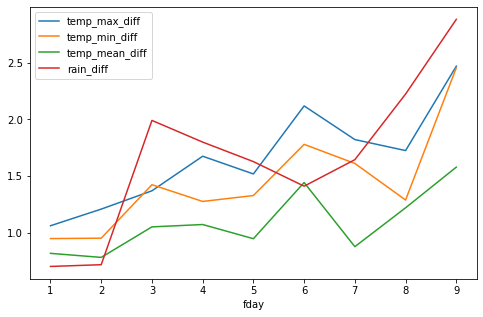

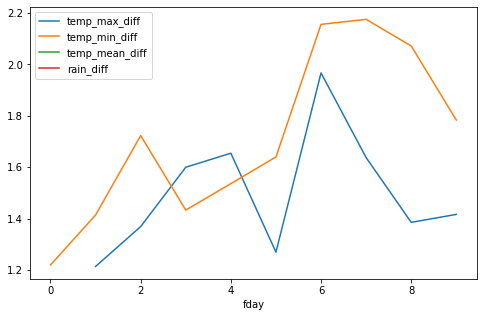

In [55]:
df_grouped.loc[(df_grouped["location"] == "Cheb") & (df_grouped["source"] == "yrno") ].plot(x="fday", figsize=(8, 5))
df_grouped.loc[(df_grouped["location"] == "Cheb") & (df_grouped["source"] == "weathercom") ].plot(x="fday", figsize=(8, 5))

#### nepodstatné poznámky, kterých se nechci vzdát
Miluju tuhle stránku: https://regex101.com/  
Jak se dostat do sloupce s multiple indexem
```
df.loc[:, [("horni","dolni")]]
```

Jedny hranaté závorky v groupby mi vytvoří Series, dvoje závorky DataFrame, .agg() udělá taky dataframe